In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [11]:
## 보스턴 주택가격 회귀  // 데이터 제공 안하므로 인터넷에서 연결

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# 당뇨병 수치예측 -선형회귀/단순선형회귀

In [14]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
diabet_df=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabet_df['target']=diabetes.target

In [17]:
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

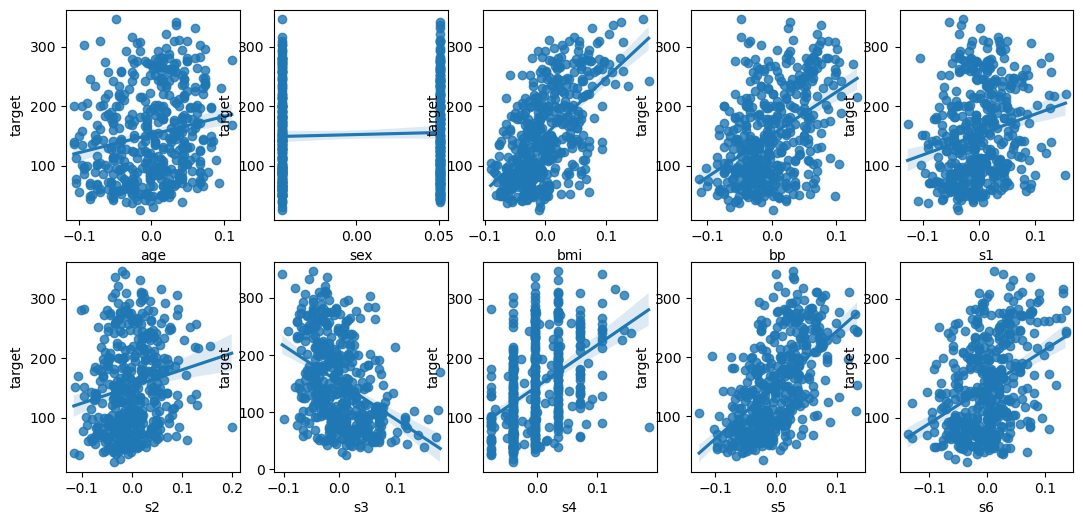

In [24]:
fig, axs=plt.subplots(figsize=(13,6), ncols=5, nrows=2)
lm_features=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

for i, feature in enumerate(lm_features):
    row=int(i/5)
    col=i%5
    sns.regplot(x=feature, y='target', data=diabet_df, ax=axs[row][col])
diabet_df.corr()['target']

In [25]:
diabet_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score                                              

y = diabet_df.iloc[:, -1]
X = diabet_df.iloc[:, :-1]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train ,y_train )
pred = lr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f} , RMSE : {rmse:.3F}')
print(f'Variance score : {r2_score(y_test, pred):.3f}')                                               

MSE : 2993.705 , RMSE : 54.715
Variance score : 0.497


In [ ]:
plt.plot(y_test, 'ro', label = 'y_test' )
plt.plot(pred, 'bo', label = 'pred')
plt.legend()

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train ,y_train )
pred = lr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f} , RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, pred):.3f}')

MSE : 2993.705 , RMSE : 54.715
Variance score : 0.497


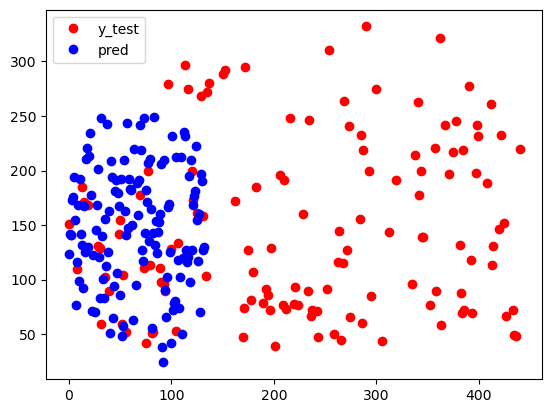

In [44]:
plt.plot(y_test, 'ro', label = 'y_test' )
plt.plot(pred, 'bo', label = 'pred')
plt.legend()

In [45]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores:', np.round(-1 * neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')

5 folds 의 개별 Negative MSE scores: [2779.92 3028.84 3237.69 3008.75 2910.21]
5 folds 의 개별 RMSE scores : [52.72 55.03 56.9  54.85 53.95]
5 folds 의 평균 RMSE : 54.692
